<div style = "font-family:Georgia;
              font-size:2.5vw;
              color:lightblue;
              font-style:bold;
              text-align:center;
              background:url('./iti/Title Background.gif') no-repeat center;
              background-size:cover)">
              
     You Only Look Once (YOLO)
     
</div>

<h1 style = "text-align:left">Introduction</h1>

YOLO is real-time object detection algorithm. In this notebook, we will apply the YOLO algorithm to detect objects in images. 

# Importing Resources

We will start by loading the required packages into Python. We will be using *OpenCV* to load our images, *matplotlib* to plot them, a`utils` module that contains some helper functions,np is NumPy, used for numerical operations. Loading the YOLO network architecture and pre-trained weights using OpenCV's DNN moduleInstead, we will be using a set of pre-trained weights that were trained on the Common Objects in Context (COCO) database.

In [156]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [157]:
# Set the location and name of the cfg file
cfg_file = './yolov3.cfg'

# Set the location and name of the pre-trained weights file
weight_file = './yolov3.weights'

# Set the location and name of the COCO object classes file
namesfile = './coco.names'

In [158]:
# Load the COCO class names
with open(namesfile, 'r') as f:
    class_names = f.read().strip().split('\n')
print(class_names)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [159]:
# Load the network architecture and pre-trained weights
net = cv2.dnn.readNetFromDarknet(cfg_file, weight_file)

Now that the neural network has been setup, we can see what it looks like.
As we can see, the neural network used by YOLOv3 consists mainly of convolutional layers, with some shortcut connections and upsample layers

In [160]:
layer_names = net.getLayerNames()

print("Layer names:")
for i, layer_name in enumerate(layer_names):
    print(f"Layer {i + 1}: {layer_name}")



Layer names:
Layer 1: conv_0
Layer 2: bn_0
Layer 3: leaky_1
Layer 4: conv_1
Layer 5: bn_1
Layer 6: leaky_2
Layer 7: conv_2
Layer 8: bn_2
Layer 9: leaky_3
Layer 10: conv_3
Layer 11: bn_3
Layer 12: leaky_4
Layer 13: shortcut_4
Layer 14: conv_5
Layer 15: bn_5
Layer 16: leaky_6
Layer 17: conv_6
Layer 18: bn_6
Layer 19: leaky_7
Layer 20: conv_7
Layer 21: bn_7
Layer 22: leaky_8
Layer 23: shortcut_8
Layer 24: conv_9
Layer 25: bn_9
Layer 26: leaky_10
Layer 27: conv_10
Layer 28: bn_10
Layer 29: leaky_11
Layer 30: shortcut_11
Layer 31: conv_12
Layer 32: bn_12
Layer 33: leaky_13
Layer 34: conv_13
Layer 35: bn_13
Layer 36: leaky_14
Layer 37: conv_14
Layer 38: bn_14
Layer 39: leaky_15
Layer 40: shortcut_15
Layer 41: conv_16
Layer 42: bn_16
Layer 43: leaky_17
Layer 44: conv_17
Layer 45: bn_17
Layer 46: leaky_18
Layer 47: shortcut_18
Layer 48: conv_19
Layer 49: bn_19
Layer 50: leaky_20
Layer 51: conv_20
Layer 52: bn_20
Layer 53: leaky_21
Layer 54: shortcut_21
Layer 55: conv_22
Layer 56: bn_22
Layer 5

In [161]:
# Load the image
img = cv2.imread('./images/food.jpg')
img.shape

(480, 640, 3)

Convert the image to a blob (a binary large object) to prepare it for input into the network. The image is resized to 416x416, and pixel values are scaled to [0, 1]. The swapRB=True parameter converts the image from BGR (OpenCV default) to RGB.

In [162]:
# Get the width and height of the image
height, width = img.shape[:2]

# Create a blob from the image
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

In [163]:
blob.shape

(1, 3, 416, 416)

Set the blob as input to the network.

In [164]:
# Set the input for the network
net.setInput(blob)

Get the names of the output layers in the network. net.getUnconnectedOutLayers() returns the indices of the output layers, and the list comprehension converts these indices to names.

In [165]:
# Get the output layer names
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
print(ln)

['yolo_82', 'yolo_94', 'yolo_106']


In [166]:
# Forward pass to get the output of the output layers
layer_outputs = net.forward(ln)
print(layer_outputs)

(array([[0.03800335, 0.04587167, 0.4926848 , ..., 0.        , 0.        ,
        0.        ],
       [0.04709449, 0.04128602, 0.35264575, ..., 0.        , 0.        ,
        0.        ],
       [0.04098821, 0.03918643, 0.76948065, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9478996 , 0.94749576, 0.36236227, ..., 0.        , 0.        ,
        0.        ],
       [0.9532776 , 0.9622291 , 0.2758662 , ..., 0.        , 0.        ,
        0.        ],
       [0.9645332 , 0.96117455, 0.8313819 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01794357, 0.02459019, 0.0473836 , ..., 0.        , 0.        ,
        0.        ],
       [0.01733689, 0.02243059, 0.3305418 , ..., 0.        , 0.        ,
        0.        ],
       [0.02170827, 0.01551601, 0.08026646, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9741531 , 0.9708464 , 0.0428349 , ..., 0.        , 0.        ,
        0.        ],
       [0.98021424

Initialize empty lists to store the bounding boxes, confidence scores, and class IDs of detected objects.

In [167]:
# Initialize lists to hold detection results
boxes = []
confidences = []
class_ids = []


1.This loop iterates over each output from the neural network's layers. layer_outputs contains the output of each layer after performing a forward pass through the network.
2.Within each layer's output, we iterate over each detection. A detection represents a potential object found by the YOLO algorithm.
3.For each detection, we extract the confidence scores for all classes (starting from index 5) and determine the class with the highest confidence (class_id). The confidence score for this class is stored in confidence.
4.We check if the confidence score is higher than a threshold value (0.5 in this case). If it is, we consider this detection as valid.
5.If the detection passes the confidence threshold, we calculate the bounding box coordinates (box) based on the detection's output. These coordinates are scaled according to the image's dimensions.
We then calculate the (x, y) coordinates of the top-left corner of the bounding box and its width and height.
The bounding box coordinates, confidence score, and class ID are appended to their respective lists (boxes, confidences, and class_ids), forming the detected object's information.

In [168]:
# Loop over each of the layer outputs
for output in layer_outputs:
    
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        if confidence > 0.5:
            box = detection[0:4] * np.array([width, height, width, height])
            print(box)
            (centerX, centerY, w, h) = box.astype('int')

            x = int(centerX - (w / 2))
            y = int(centerY - (h / 2))

            boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(class_id)



[332.0419693   90.83832264 150.14215469  65.34272432]
[316.56007767 247.89299011 156.41748428  95.79689741]
[323.72032166 246.57657623 602.799263   422.80211449]
[318.20781708 262.8110218  159.89096642  94.0421319 ]
[322.90077209 282.09815025 589.48562622 404.30459976]
[490.16609192 288.70542526 133.20012093  90.97673893]
[498.91910553 290.084095   147.75834084  89.65531111]
[322.48111725 311.54376984 613.22048187 326.5886879 ]
[501.14521027 297.63462067 158.80700111  93.88009071]
[433.8010788  400.92000961 151.81967735 129.65871334]
[455.74714661 401.38189316 173.17598343 123.03138256]
[472.981987   402.17425346 293.10201645 153.75401974]
[580.77514648 384.49290276 127.74357796 122.75917053]
[429.89967346 414.26762581 141.52236938 124.09273624]
[470.95180511 416.11261368 195.70253372 120.16890049]
[474.73510742 410.41583061 269.30833817 146.88134193]
[520.21354675 431.33068085 171.79592133  88.57563972]
[268.64789963  65.91018677  74.65313435  46.50778055]
[274.90653992  66.90793276  

In [169]:
print(boxes)

[[257, 57, 150, 65], [238, 199, 156, 95], [22, 35, 602, 422], [238, 215, 159, 94], [27, 80, 589, 404], [423, 243, 133, 90], [424, 245, 147, 89], [15, 148, 613, 326], [422, 250, 158, 93], [357, 335, 151, 129], [368, 339, 173, 123], [325, 325, 293, 153], [516, 323, 127, 122], [358, 352, 141, 124], [372, 356, 195, 120], [339, 337, 269, 146], [434, 387, 171, 88], [231, 42, 74, 46], [232, 42, 84, 47], [357, 44, 96, 56], [188, 70, 93, 34], [271, 56, 137, 65], [281, 58, 131, 62], [357, 43, 95, 65], [113, 85, 98, 40], [270, 61, 139, 64], [34, 108, 114, 53], [0, 148, 73, 57], [505, 211, 111, 50], [522, 210, 100, 52], [541, 251, 70, 116], [533, 252, 79, 131], [522, 319, 117, 125], [521, 331, 118, 122], [388, 381, 37, 60], [472, 407, 114, 63], [175, 361, 33, 37], [442, 367, 15, 35], [397, 391, 24, 38], [461, 393, 24, 35], [421, 405, 50, 29], [381, 416, 32, 25], [378, 415, 37, 27]]


In [170]:
print(confidences)

[0.5967977643013, 0.9451278448104858, 0.5811006426811218, 0.5628888010978699, 0.8763530254364014, 0.9276883602142334, 0.9786606431007385, 0.8581411242485046, 0.8824459314346313, 0.8289219737052917, 0.6786189079284668, 0.5309252738952637, 0.9806575775146484, 0.6369653940200806, 0.5309568047523499, 0.6266879439353943, 0.9067792892456055, 0.8171195983886719, 0.7962282299995422, 0.5841225385665894, 0.8420254588127136, 0.9907273650169373, 0.9047658443450928, 0.9775862693786621, 0.9311115145683289, 0.8862071633338928, 0.73874431848526, 0.5294755101203918, 0.6333761811256409, 0.6828939914703369, 0.9238736033439636, 0.8995832800865173, 0.8615531325340271, 0.8627697229385376, 0.7164724469184875, 0.5928601026535034, 0.6171733736991882, 0.5462530851364136, 0.5134606957435608, 0.5823928117752075, 0.5016427040100098, 0.5724760293960571, 0.6256256699562073]


In [171]:
print(class_ids)

[45, 45, 60, 45, 60, 45, 45, 60, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 45, 45, 51, 44, 51, 51, 51, 51, 51, 51, 51]


# Setting the Non-Maximal Suppression Threshold

As you learned in the previous lessons, YOLO uses **Non-Maximal Suppression (NMS)** to only keep the best bounding box. The first step in NMS is to remove all the predicted bounding boxes that have a detection probability that is less than a given NMS threshold.  In the code below, we set this NMS threshold to `0.6`. This means that all predicted bounding boxes that have a detection probability less than 0.6 will be removed. 

This part of the code performs Non-Maximum Suppression (NMS) to eliminate redundant overlapping bounding boxes and then draws the remaining bounding boxes with their associated class names and confidence scores on the image.

In [172]:
# Apply non-maxima suppression to suppress weak and overlapping bounding boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indices)

[21 12  6 23  1 24 30 16  4 20  9 17 26 34 29 42 36 39 37 27 40]


If there are any bounding boxes to keep:
Draw each bounding box on the image with a random color.
Annotate the box with the class name and confidence score.

If there are any bounding boxes remaining after NMS, it iterates over each box:
Retrieves the bounding box coordinates (box).
Generates a random color for drawing the bounding box.
Draws the bounding box rectangle on the image using cv2.rectangle().
Constructs text displaying the class name and confidence score.
Writes the text above the bounding box using cv2.putText().

In [173]:
# Draw the bounding boxes and class names on the image
if len(indices) > 0:
    for i in indices.flatten():
        box = boxes[i]
        (x, y, w, h) = box
        color = [int(c) for c in np.random.randint(0, 255, size=3)]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        text = f"{class_names[class_ids[i]]}: {confidences[i]:.2f}"
        cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [174]:
# Convert the image to RGB for plotting
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

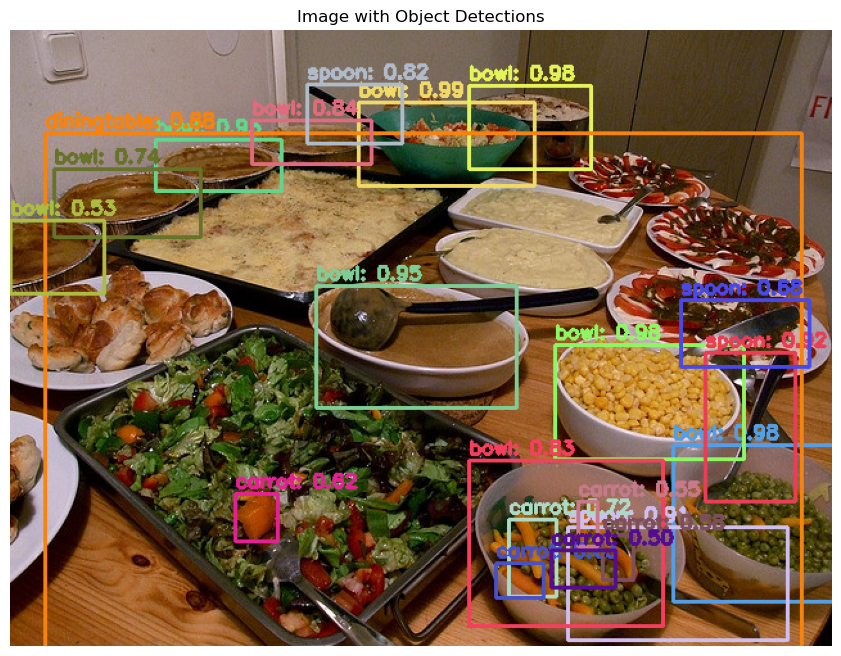

In [175]:
# Display the image with detections
plt.figure(figsize=(12, 8))
plt.imshow(rgb_image)
plt.title('Image with Object Detections')
plt.axis('off')
plt.show()